In [3]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [4]:
df=pd.read_csv("C:\\Users\\balus\\Downloads\\archive (9)\\Loan_default.csv")

In [5]:
# One-hot encode categorical columns
onehot_cols = ["EmploymentType", "MaritalStatus", "LoanPurpose", "Education", "HasMortgage", "HasDependents", "HasCoSigner"]
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded = encoder.fit_transform(df[onehot_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(onehot_cols), index=df.index)

In [6]:
df = df.drop(columns=onehot_cols)
df = pd.concat([df, encoded_df], axis=1)

In [7]:
# Drop ID column
df.drop('LoanID', axis=1, inplace=True)

In [8]:
# Define features and target
X = df.drop('Default', axis=1)
y = df['Default']

In [9]:
# Train-test split (before SMOTE!)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [10]:
# Apply SMOTE to training set only
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [11]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

#k_values = range(1, 21)
#k_values = [50, 70,100,150]
k_values = [10,30,50,70,100,150,200,300,400,500,600,700,800,900,1000,1200,1500]
#k_values = range(40, 60)
f1_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_res)
    y_pred = knn.predict(X_test_scaled)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)


In [12]:
f1_scores

[0.24953063662741082,
 0.29694575585316507,
 0.30849718794960107,
 0.30706742485783917,
 0.3054183505463254,
 0.2974864130434783,
 0.2902468430737991,
 0.28102623568633134,
 0.27504429603380126,
 0.2685471909235213,
 0.2638836560922312,
 0.25986328125,
 0.25654325687636814,
 0.25373238616513333,
 0.25120795072019053,
 0.24673446227107856,
 0.24191915929108254]

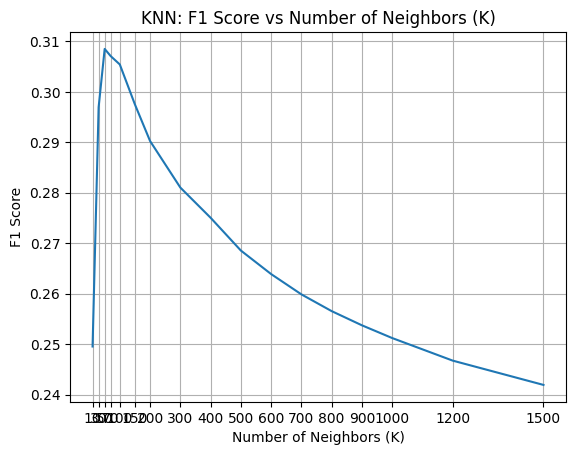

In [13]:
# Plot the Elbow Curve

plt.plot(k_values, f1_scores)
plt.title("KNN: F1 Score vs Number of Neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("F1 Score")
plt.xticks(k_values)
#plt.grid()
plt.show()

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

#k_values = range(1, 21)
#k_values = [50, 70,100,150]
#k_values = [10,30,50,70,100,150,200,300,400,500,600,700,800,900,1000,1200,1500]
k_values = range(40, 60)
f1_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_res)
    y_pred = knn.predict(X_test_scaled)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)


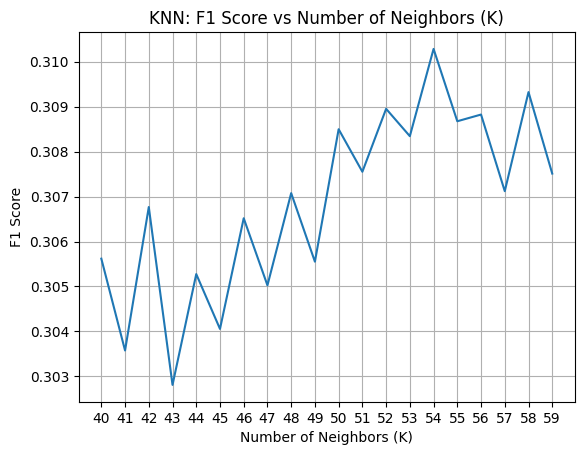

In [15]:
# Plot the Elbow Curve

plt.plot(k_values, f1_scores)
plt.title("KNN: F1 Score vs Number of Neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("F1 Score")
plt.xticks(k_values)
plt.grid()
plt.show()

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=54)

In [14]:
knn.fit(X_train_scaled, y_train_res)

KNeighborsClassifier(n_neighbors=54)

In [15]:
y_pred = knn.predict(X_test_scaled)

In [17]:
y_pred_smote=y_pred

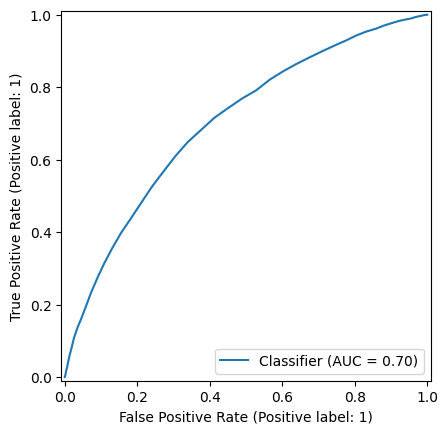

In [18]:
#Evaluate

from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, confusion_matrix, 
                            classification_report, RocCurveDisplay)

# Predict labels and probabilities
y_proba_smote = knn.predict_proba(X_test_scaled)[:, 1]  

# Metrics
accuracy = accuracy_score(y_test, y_pred_smote)
precision = precision_score(y_test, y_pred_smote)
recall = recall_score(y_test, y_pred_smote)
f1 = f1_score(y_test, y_pred_smote)
roc_auc = roc_auc_score(y_test, y_proba_smote)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_smote)
TN, FP, FN, TP = conf_matrix.ravel()

RocCurveDisplay.from_predictions(y_test, y_proba_smote)

In [19]:
print("KNN Classifier Performance:")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, AUC: {roc_auc:.4f}, f1:{f1}")
print("Confusion Matrix:\n", conf_matrix)

KNN Classifier Performance:
Accuracy: 0.6848, Precision: 0.2080, Recall: 0.6105, AUC: 0.7033, f1:0.3102827763496144
Confusion Matrix:
 [[31351 13788]
 [ 2310  3621]]


#### KNN || RandomOverSampling ||

In [20]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='auto', random_state=123)
X_resampled, y_resampled = oversample.fit_resample(X_train, y_train)

In [21]:
# Scale features
scaler = StandardScaler()
X_train_ovsam = scaler.fit_transform(X_resampled)
X_test_ovsam = scaler.transform(X_test)

In [24]:
#k_values = range(1, 21)
#k_values = [50, 70,100,150]
k_values = [10,30,50,70,100,150,200,300,400,500,600,700,800,900,1000,1200,1500,1800,2000]
#k_values = range(40, 60)
f1_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_ovsam, y_resampled)
    y_pred_ovsam = knn.predict(X_test_ovsam)
    f1 = f1_score(y_test, y_pred_ovsam)
    f1_scores.append(f1)


In [26]:
f1_scores

[0.24153675291020527,
 0.2735655737704918,
 0.288105898384271,
 0.29472868217054266,
 0.3007119492014624,
 0.3091090476555905,
 0.31441182114757243,
 0.3169579412329556,
 0.31927479449950064,
 0.3210197909887838,
 0.3215409408333973,
 0.3222465185867188,
 0.3228110599078341,
 0.3231246885660623,
 0.324975078598267,
 0.32503727491684825,
 0.3251479854878747,
 0.32599152574722295,
 0.32783882783882784]

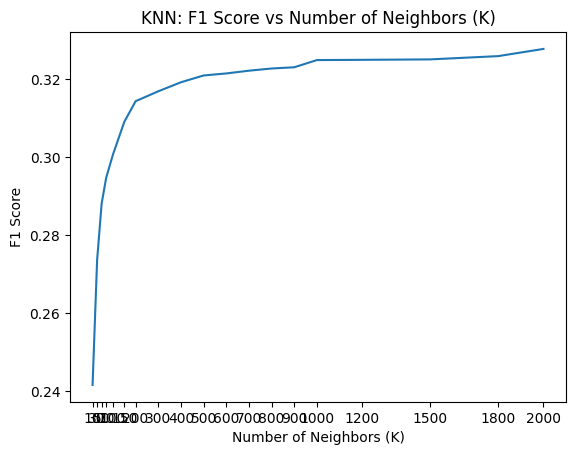

In [25]:
# Plot the Elbow Curve

plt.plot(k_values, f1_scores)
plt.title("KNN: F1 Score vs Number of Neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("F1 Score")
plt.xticks(k_values)
plt.show()

In [27]:
#k_values = range(1, 21)

k_values = [2250,2500,2750,3000,3250]

f1_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_ovsam, y_resampled)
    y_pred_ovsam = knn.predict(X_test_ovsam)
    f1 = f1_score(y_test, y_pred_ovsam)
    f1_scores.append(f1)


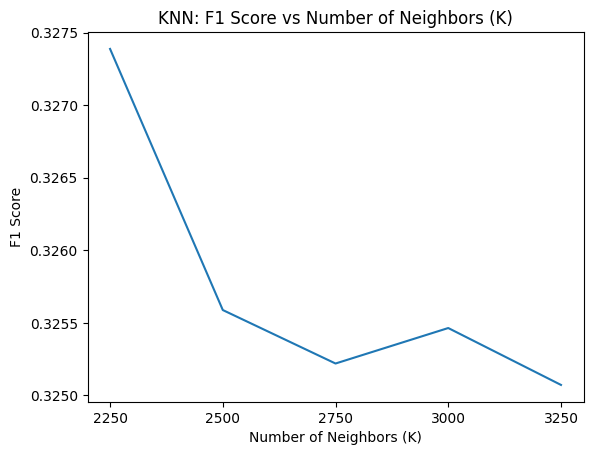

In [28]:
# Plot the Elbow Curve

plt.plot(k_values, f1_scores)
plt.title("KNN: F1 Score vs Number of Neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("F1 Score")
plt.xticks(k_values)
plt.show()

In [29]:
f1_scores

[0.3273879998472291,
 0.3255884933806417,
 0.325219974860016,
 0.3254645141638745,
 0.3250724416653958]

In [22]:
knn = KNeighborsClassifier(n_neighbors=2000)

In [23]:
knn.fit(X_train_ovsam, y_resampled)

KNeighborsClassifier(n_neighbors=2000)

In [24]:
y_pred_ovsam = knn.predict(X_test_ovsam)

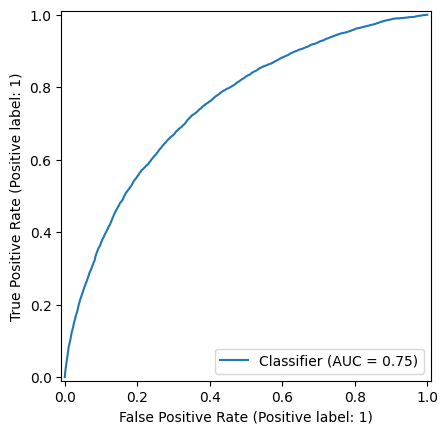

In [25]:
#Evaluate

from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, confusion_matrix, 
                            classification_report, RocCurveDisplay)

# Predict labels and probabilities
y_proba_ovsam = knn.predict_proba(X_test_ovsam)[:, 1]  

# Metrics
accuracy = accuracy_score(y_test, y_pred_ovsam)
precision = precision_score(y_test, y_pred_ovsam)
recall = recall_score(y_test, y_pred_ovsam)
f1 = f1_score(y_test, y_pred_ovsam)
roc_auc = roc_auc_score(y_test, y_proba_ovsam)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_ovsam)
TN, FP, FN, TP = conf_matrix.ravel()

RocCurveDisplay.from_predictions(y_test, y_proba_ovsam)

In [26]:
print("KNN Classifier Performance:")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, AUC: {roc_auc:.4f}, f1:{f1}")
print("Confusion Matrix:\n", conf_matrix)

KNN Classifier Performance:
Accuracy: 0.6551, Precision: 0.2119, Recall: 0.7243, AUC: 0.7494, f1:0.32783882783882784
Confusion Matrix:
 [[29158 15981]
 [ 1635  4296]]


#### || KNN || UnderSampling ||

In [27]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='auto', random_state=123)
X_unsampled, y_unsampled = undersample.fit_resample(X_train, y_train)


In [28]:
# Scale features
scaler = StandardScaler()
X_train_unsam = scaler.fit_transform(X_unsampled)
X_test_unsam = scaler.transform(X_test)

In [43]:
#k_values = range(1, 21)
#k_values = [50, 70,100,150]
k_values = [10,30,50,70,100,150,200,300,400,500,600,700,800,900,1000,1200,1500,1800,2000]
#k_values = range(40, 60)
f1_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_unsam, y_unsampled)
    y_pred_uvsam = knn.predict(X_test_unsam)
    f1 = f1_score(y_test, y_pred_uvsam)
    f1_scores.append(f1)


In [45]:
f1_scores

[0.28516962003379404,
 0.31185182196037287,
 0.3146991381355262,
 0.3186834766898394,
 0.31783968340187785,
 0.3199938254929958,
 0.3225458468176915,
 0.32393987159278764,
 0.32395338138322344,
 0.32432639021593734,
 0.3253595818549464,
 0.32490590426947497,
 0.32456273764258553,
 0.3240206498633465,
 0.32520571840279094,
 0.326062258577596,
 0.32687358062074184,
 0.326750991127053,
 0.32713810818978545]

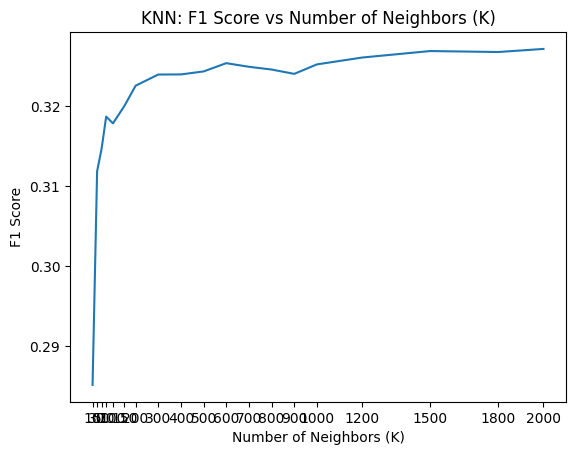

In [44]:
# Plot the Elbow Curve

plt.plot(k_values, f1_scores)
plt.title("KNN: F1 Score vs Number of Neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("F1 Score")
plt.xticks(k_values)
plt.show()

In [46]:
#k_values = range(1, 21)
#k_values = [50, 70,100,150]
k_values = [2000,2250,2500,2750,3000,3200]
#k_values = range(40, 60)
f1_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_unsam, y_unsampled)
    y_pred_ovsam = knn.predict(X_test_unsam)
    f1 = f1_score(y_test, y_pred_ovsam)
    f1_scores.append(f1)


In [48]:
f1_scores

[0.32713810818978545,
 0.32723707530449864,
 0.32616635915201264,
 0.32713026444662097,
 0.327248089735386,
 0.3263847080072246]

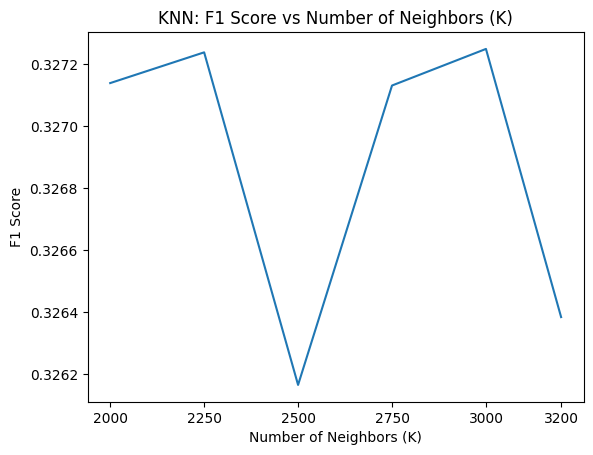

In [47]:
# Plot the Elbow Curve

plt.plot(k_values, f1_scores)
plt.title("KNN: F1 Score vs Number of Neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("F1 Score")
plt.xticks(k_values)
plt.show()

In [29]:
knn = KNeighborsClassifier(n_neighbors=2250)

In [30]:
knn.fit(X_train_unsam, y_unsampled)

KNeighborsClassifier(n_neighbors=2250)

In [31]:
y_pred_uvsam = knn.predict(X_test_unsam)

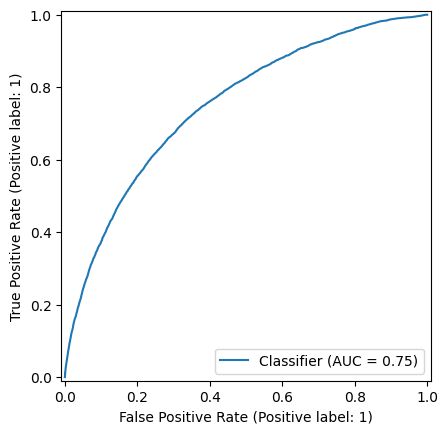

In [32]:
#Evaluate

from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, confusion_matrix, 
                            classification_report, RocCurveDisplay)

# Predict labels and probabilities
y_proba = knn.predict_proba(X_test_unsam)[:, 1]  

# Metrics
accuracy = accuracy_score(y_test, y_pred_uvsam)
precision = precision_score(y_test, y_pred_uvsam)
recall = recall_score(y_test, y_pred_uvsam)
f1 = f1_score(y_test, y_pred_uvsam)
roc_auc = roc_auc_score(y_test, y_proba)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_uvsam)
TN, FP, FN, TP = conf_matrix.ravel()

RocCurveDisplay.from_predictions(y_test, y_proba)

In [33]:
print("KNN Classifier Performance:")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, AUC: {roc_auc:.4f}, f1:{f1}")
print("Confusion Matrix:\n", conf_matrix)

KNN Classifier Performance:
Accuracy: 0.6507, Precision: 0.2108, Recall: 0.7316, AUC: 0.7504, f1:0.32723707530449864
Confusion Matrix:
 [[28890 16249]
 [ 1592  4339]]
